<a href="https://colab.research.google.com/github/ali-qadir501/Predicting-Healthcare-Costs-with-Regression-Analysis/blob/main/Insurance_charges_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import pandas as pd

import pandas as pd
insurance=pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/insurance.csv')
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


## Task #1: Clean up the data
### - Are there any missing values?
### - Standardize categories in region
### - Standardize sex to just two categories
### - Change smoker column to boolean
### - Standardize charges data type (float)

In [ ]:
#Are there any missing values?

insurance.isnull().sum()

,0
age,66
sex,66
bmi,66
children,66
smoker,66
region,66
charges,54


In [ ]:
insurance.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
region,object
charges,object


In [ ]:
insurance_filled = insurance.dropna()
insurance_filled.isnull().sum()
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [ ]:
# Standardize categories in region
insurance_filled['region'].unique()
# Ensure you're working with a copy of the DataFrame
insurance_filled = insurance_filled.copy()

# Convert the 'region' column to lowercase
insurance_filled['region'] = insurance_filled['region'].str.lower()

# Check the unique values to confirm everything is lowercase
print(insurance_filled['region'].unique())


['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
#Standardize sex to just two categories
FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)

In [ ]:
insurance_filled['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
#Change smoker column to boolean
insurance_filled['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

In [ ]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


In [ ]:
#Standardize charges data type (float)
insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')


In [ ]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [ ]:
import numpy as np
#converting the negative ages to positive
insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

insurance_pos.sample(10)

,age,sex,bmi,children,smoker,region,charges
201,48.0,female,32.230,1.0,False,southeast,8871.15170
333,56.0,female,28.785,0.0,False,northeast,11658.37915
336,60.0,male,25.740,0.0,False,southeast,12142.57860
537,46.0,female,30.200,2.0,False,southwest,8825.08600
734,59.0,female,32.100,3.0,False,southwest,14007.22200
384,44.0,male,22.135,2.0,False,northeast,8302.53565
693,24.0,male,23.655,0.0,False,northwest,2352.96845
385,19.0,male,34.400,0.0,False,southwest,1261.85900
408,38.0,male,21.120,3.0,False,southeast,6652.52880
1059,32.0,male,33.820,1.0,False,northwest,4462.72180


# Task #2: Scatterplots of relationships between variables & charges


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

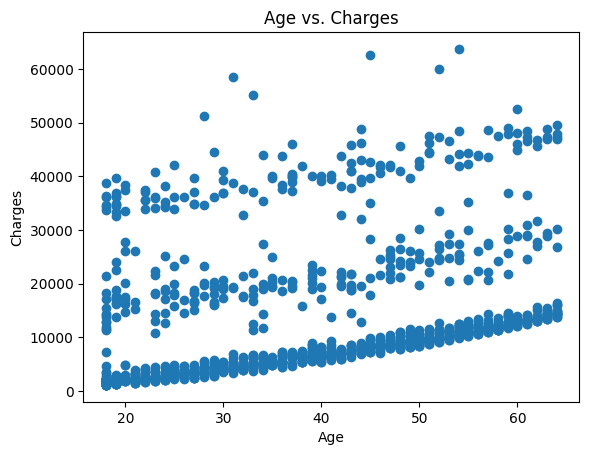

In [ ]:
df = insurance_pos.copy()
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()


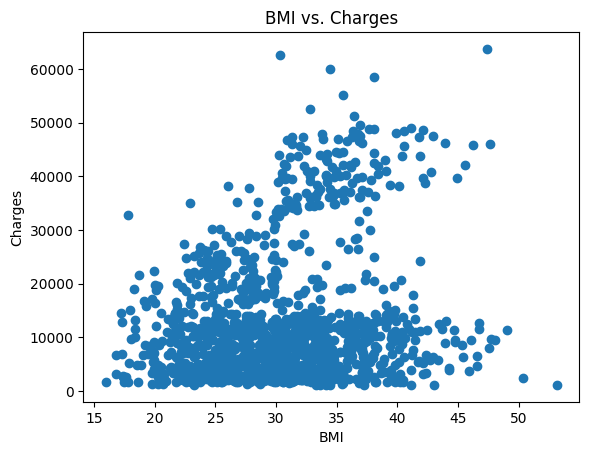

In [ ]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

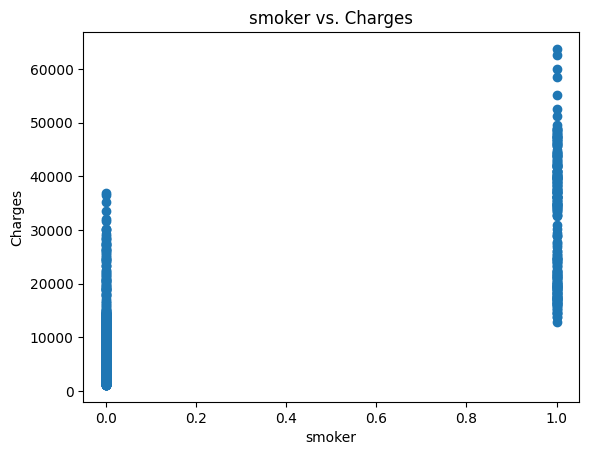

In [ ]:
plt.scatter(df['smoker'], df['charges'])
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('smoker vs. Charges')
plt.show()

# Task #3 - Prepare the data for a model fitting

In [ ]:
# Task #3 - Prepare the data for a model fitting

# One-hot encode the 'region' column and drop 'region_southeast' as reference
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])

# Convert 'smoker' column from 'yes'/'no' to 1/0
df_new['smoker'] = df_new['smoker'].astype('int64')

# Create 'is_male' column and drop 'sex' column
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

# Drop any rows with missing values
df_new = df_new.dropna()

# Display the first few rows of the modified dataframe
df_new.head()


,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


In [ ]:
# Define the dependent variable (y) and independent variables (X)
y = df_new['charges']  # Assuming 'charges' is the column to predict
X = df_new.drop(columns=['charges'])  # All other columns as features

# Check data types of the independent variables (X)
print(X.dtypes)

# Check data type of the dependent variable (y)
print(y.dtypes)


age                 float64
bmi                 float64
children            float64
smoker                int64
region_northeast       bool
region_northwest       bool
region_southwest       bool
is_male               int64
dtype: object
float64


In [ ]:
# Convert charges to numeric if it's not already
df_new['charges'] = pd.to_numeric(df_new['charges'], errors='coerce')

# Ensure that 'smoker' is numerical (it should already be, but just in case)
df_new['smoker'] = df_new['smoker'].astype(int)

# Convert boolean columns to integer (0 and 1)
df_new['region_northwest'] = df_new['region_northwest'].astype(int)
df_new['region_southwest'] = df_new['region_southwest'].astype(int)
df_new['region_northeast'] = df_new['region_northeast'].astype(int)

# Re-check data types to confirm the changes
print(df_new.dtypes)



age                 float64
bmi                 float64
children            float64
smoker                int64
charges             float64
region_northeast      int64
region_northwest      int64
region_southwest      int64
is_male               int64
dtype: object


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

# Define independent variables (predictors) and dependent variable (charges)
X = df_new[['age', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southwest', 'region_northeast', 'is_male']]
y = df_new['charges']

# Add constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     446.9
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:08:40   Log-Likelihood:                -12228.
No. Observations:                1207   AIC:                         2.447e+04
Df Residuals:                    1198   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.241e+04   1133.311  

1. Coefficients (coef)
These represent the estimated effect of each independent variable on the dependent variable (insurance charges). In a multiple regression, each coefficient shows how much the dependent variable is expected to change, on average, with a one-unit change in the predictor, holding all other predictors constant.

const: This is the intercept of the regression equation. It represents the average value of the dependent variable (charges) when all the independent variables are 0. This value gives the baseline level of charges when all predictors are at their reference values (e.g., a person with age 0, BMI 0, no children, non-smoker, etc.).

age: This coefficient shows the expected change in insurance charges for a one-year increase in age, holding all other variables constant.

bmi: This coefficient shows the expected change in insurance charges for a one-unit increase in BMI, holding all other variables constant. A positive coefficient would mean that as BMI increases, the insurance charges increase.

children: This coefficient represents the change in insurance charges with each additional child.

smoker: This is a binary variable (1 for smokers, 0 for non-smokers). The coefficient for smoker shows how much more (or less) a smoker is expected to pay in insurance charges compared to a non-smoker, holding all other variables constant.

region_northwest, region_southwest, region_northeast: These dummy variables represent the effect of living in these regions on insurance charges, compared to the reference region (likely southeast, which was dropped). A positive coefficient would indicate that living in a specific region increases charges, while a negative coefficient would indicate a decrease.

is_male: This variable represents gender, where 1 = male, and 0 = female. The coefficient for is_male shows how much more (or less) males are expected to pay compared to females, holding all other variables constant.

2. P-values
The p-value for each coefficient tests the null hypothesis that the coefficient is equal to zero (i.e., no effect).

A low p-value (typically < 0.05) indicates that you can reject the null hypothesis, suggesting that the predictor is statistically significant.
A high p-value (> 0.05) suggests that the variable may not have a significant effect on insurance charges.
3. R-squared and Adjusted R-squared
R-squared: This value explains how much of the variance in the dependent variable (charges) is explained by the independent variables. The closer to 1, the better the model fits the data.
Adjusted R-squared: This adjusts the R-squared value for the number of predictors. It's often a more reliable indicator, especially when adding more variables to the model.
4. F-statistic and Prob (F-statistic)
The F-statistic tests whether at least one of the regression coefficients is different from zero. A significant p-value for the F-statistic (typically < 0.05) indicates that the model as a whole is statistically significant.


**Check for Multicollinearity**
To check whether any of the independent variables are highly correlated with each other (which can lead to unreliable coefficient estimates), calculate the Variance Inflation Factor (VIF).

*A VIF value greater than 10 typically indicates high multicollinearity, which can be problematic*

In [ ]:
# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


            feature        VIF
0             const  41.656600
1               age   1.020578
2               bmi   1.100418
3          children   1.004879
4            smoker   1.011738
5  region_northwest   1.542001
6  region_southwest   1.495493
7  region_northeast   1.544957
8           is_male   1.007092


**Test for Heteroscedasticity**
You can use the Breusch-Pagan test to check for heteroscedasticity (non-constant variance of residuals), which is an assumption of linear regression.

*If the p-value is significant (typically < 0.05), it indicates that heteroscedasticity is present, and you may need to use a robust regression method.*

In [ ]:
# Perform Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the model and get residuals and independent variables
residuals = model.resid
_, pval, __, f_pval = het_breuschpagan(residuals, X)

print(f"Breusch-Pagan p-value: {pval}")


Breusch-Pagan p-value: 2.0661987378260818e-21


**Plot Residuals**
Visualizing residuals helps to check for normality and homoscedasticity (constant variance of residuals).

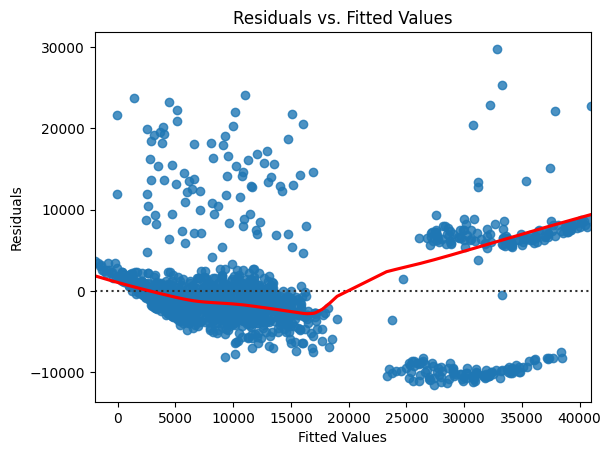

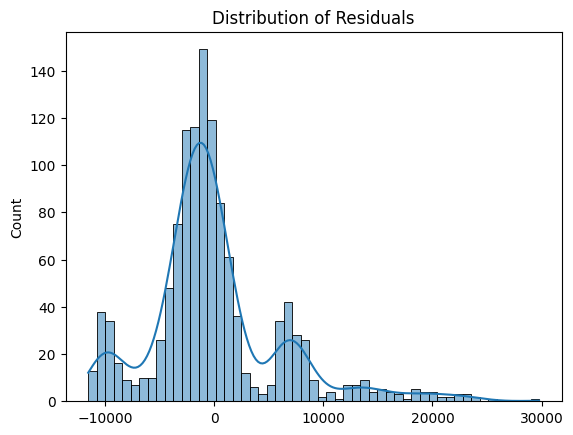

In [ ]:
# Plot residuals vs. fitted values
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Plot distribution of residuals
sns.histplot(model.resid, kde=True)
plt.title('Distribution of Residuals')
plt.show()


**Steps for Hypothesis Testing:**
Null Hypothesis (H₀):
The coefficient of the predictor variable equals zero (no effect on the dependent variable).

Alternative Hypothesis (H₁):
The coefficient of the predictor variable is not zero (it has an effect on the dependent variable).

Significance Level (α): Typically set to 0.05.
If the p-value < 0.05, you reject the null hypothesis and conclude the predictor has a statistically significant effect.
If the p-value > 0.05, you fail to reject the null hypothesis and conclude the predictor may not be a strong predictor.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_new is the cleaned dataframe with encoded variables
X = df_new[['age', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southwest', 'region_northeast', 'is_male']]
y = df_new['charges']

# Add constant to predictor variables (intercept)
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary to view p-values and t-tests
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     446.9
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:37:41   Log-Likelihood:                -12228.
No. Observations:                1207   AIC:                         2.447e+04
Df Residuals:                    1198   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.241e+04   1133.311  

**OLS Regression Results Interpretation**

**Model Fit**

R-squared: 0.749

This indicates that about 74.9% of the variation in the dependent variable (charges) is explained by the independent variables in the model. This suggests the model fits the data quite well.

Adjusted R-squared: 0.747

This is slightly lower than the R-squared, accounting for the number of predictors in the model. It suggests a good fit without overfitting, as there is only a slight difference between R-squared and Adjusted R-squared.

F-statistic: 446.9, Prob (F-statistic): 0.00

The F-statistic tests the overall significance of the model. Since the p-value for the F-statistic is 0.00, the model is statistically significant as a whole, meaning the predictors, taken together, significantly explain the variance in insurance charges.

***Significant Variables (p < 0.05):***

Age:
Coefficient: 258.99, p-value: 0.000

Interpretation: For every one year increase in age, the insurance charges increase by approximately 259 units on average, holding all other factors constant. This variable is highly significant (p < 0.05).

BMI:
Coefficient: 325.75, p-value: 0.000

Interpretation: For each one-unit increase in BMI, the insurance charges increase by approximately 326 units on average, holding all else constant. This is also a highly significant predictor of insurance charges.

Children:
Coefficient: 446.57, p-value: 0.002

Interpretation: For each additional child, the insurance charges increase by 447 units on average, holding other factors constant. This variable is statistically significant as well.

Smoker:
Coefficient: 23,940.0, p-value: 0.000

Interpretation: If the individual is a smoker, insurance charges increase by approximately 23,940 units compared to non-smokers, holding all else constant. This is a highly significant and large effect, suggesting smokers pay much higher premiums than non-smokers.

**Non-Significant Variables (p > 0.05):**

Region_Northwest:
Coefficient: 551.67, p-value: 0.278

Interpretation: Living in the Northwest region does not have a statistically significant effect on insurance charges, as the p-value is greater than 0.05.

Region_Southwest:
Coefficient: -21.32, p-value: 0.966

Interpretation: Living in the Southwest region has a near-zero and non-significant effect on insurance charges.

Region_Northeast:
Coefficient: 823.00, p-value: 0.105

Interpretation: Although living in the Northeast has a positive effect on insurance charges, it is not statistically significant (p > 0.05).

Is_Male:
Coefficient: -262.60, p-value: 0.456

Interpretation: The gender of the individual does not have a statistically significant effect on insurance charges. The negative coefficient suggests males might pay lower charges, but this effect is not significant.

**Predict Insurance Charges for New Data**

Once you're satisfied with the model diagnostics, you can use it to predict insurance charges for new or hypothetical data:

In [ ]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (X)
y = df_new['charges']  # Assuming 'charges' is the column to predict
X = df_new.drop(columns=['charges'])  # All other columns as features

# Add a constant (intercept) term to X
X = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X).fit()

# Check the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     446.9
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:14:56   Log-Likelihood:                -12228.
No. Observations:                1207   AIC:                         2.447e+04
Df Residuals:                    1198   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.241e+04   1133.311  

In [ ]:
# Example new data (age: 40, bmi: 25, children: 2, smoker: 0, region_northwest: 0, region_southwest: 1, region_northeast: 0, is_male: 1)
new_data = pd.DataFrame({'const': [1], 'age': [40], 'bmi': [25], 'children': [2], 'smoker': [0],
                         'region_northwest': [0], 'region_southwest': [1], 'region_northeast': [0], 'is_male': [1]})

# Predict charges using the trained model
predicted_charges = model.predict(new_data)
print(predicted_charges)


0    7280.316127
dtype: float64


The value 7280.316127 represents the predicted insurance charge for the new data point. This is the result of the model's prediction based on the input features (age, BMI, children, smoker status, region, and gender).
Interpretation:
For a person with the following characteristics:

Age: 40

BMI: 25

Children: 2

Smoker: No (0)

Region: Southwest (region_southwest = 1, region_northwest = 0, region_northeast = 0)

Gender: Male (is_male = 1)

The predicted insurance charge is $7,280.32.

This prediction is based on the model you trained using the OLS regression method. It reflects the expected cost of insurance for a person with the provided features, given the patterns in the data you used to train the model.